In [31]:
import pyfolio as pf
import yfinance as yf
import backtrader as bt

In [21]:
stock_data = yf.download("2330.TW", start="2015-01-01", end="2025-09-15").droplevel(
    "Ticker", axis=1
)

/var/folders/jd/cst_1lwd4vdgv06j7c62ffp00000gn/T/ipykernel_7746/4252535788.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download("2330.TW", start="2015-01-01", end="2025-09-15").droplevel(
[*********************100%***********************]  1 of 1 completed


In [22]:
stock_data

Price,Close,High,Low,Open,Volume
Date,,,,,
2015-01-05,102.972122,103.710274,101.495819,103.710274,32046000
2015-01-06,98.543198,101.495803,98.174122,101.495803,66778000
2015-01-07,98.912277,99.650429,98.543202,98.543202,43703000
2015-01-08,101.864891,101.864891,100.388588,100.757664,42491000
2015-01-09,98.912277,100.019504,98.174126,99.650429,61558000
...,...,...,...,...,...
2025-09-08,1175.298828,1190.239067,1175.298828,1190.239067,27281959
2025-09-09,1195.219116,1195.219116,1185.258957,1190.239037,31329096
2025-09-10,1220.119507,1225.099586,1210.159348,1215.139427,39665156


In [23]:
# stock_data.index = stock_data.index.tz_localize("Asia/Taipei")

In [24]:
stock_data

Price,Close,High,Low,Open,Volume
Date,,,,,
2015-01-05,102.972122,103.710274,101.495819,103.710274,32046000
2015-01-06,98.543198,101.495803,98.174122,101.495803,66778000
2015-01-07,98.912277,99.650429,98.543202,98.543202,43703000
2015-01-08,101.864891,101.864891,100.388588,100.757664,42491000
2015-01-09,98.912277,100.019504,98.174126,99.650429,61558000
...,...,...,...,...,...
2025-09-08,1175.298828,1190.239067,1175.298828,1190.239067,27281959
2025-09-09,1195.219116,1195.219116,1185.258957,1190.239037,31329096
2025-09-10,1220.119507,1225.099586,1210.159348,1215.139427,39665156


In [25]:
pct_change_close_data = stock_data["Close"].pct_change()

In [26]:
pct_change_close_data

Date
2015-01-05         NaN
2015-01-06   -0.043011
2015-01-07    0.003745
2015-01-08    0.029851
2015-01-09   -0.028986
                ...   
2025-09-08    0.000000
2025-09-09    0.016949
2025-09-10    0.020833
2025-09-11    0.012245
2025-09-12    0.016129
Name: Close, Length: 2603, dtype: float64

/opt/homebrew/Caskroom/miniforge/base/envs/stock/lib/python3.13/site-packages/pyfolio/plotting.py:670: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '27.388%' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  perf_stats.loc[stat, column] = str(np.round(value * 100, 3)) + "%"


Start date,2015-01-05
End date,2025-09-12
Total months,123
,Backtest
Annual return,27.388%
Cumulative returns,1118.757%
Annual volatility,26.787%
Sharpe ratio,1.04
Calmar ratio,0.61
Stability,0.95
Max drawdown,-44.799%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,44.80,2022-01-17,2022-10-25,2024-02-15,544
1,30.51,2025-01-22,2025-04-09,2025-07-16,126
2,27.63,2020-01-14,2020-03-19,2020-07-08,127
3,24.54,2024-07-11,2024-08-05,2024-10-18,72
4,23.20,2015-02-25,2015-08-24,2016-02-18,257


/opt/homebrew/Caskroom/miniforge/base/envs/stock/lib/python3.13/site-packages/pyfolio/plotting.py:1407: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["Daily", "Weekly", "Monthly"])


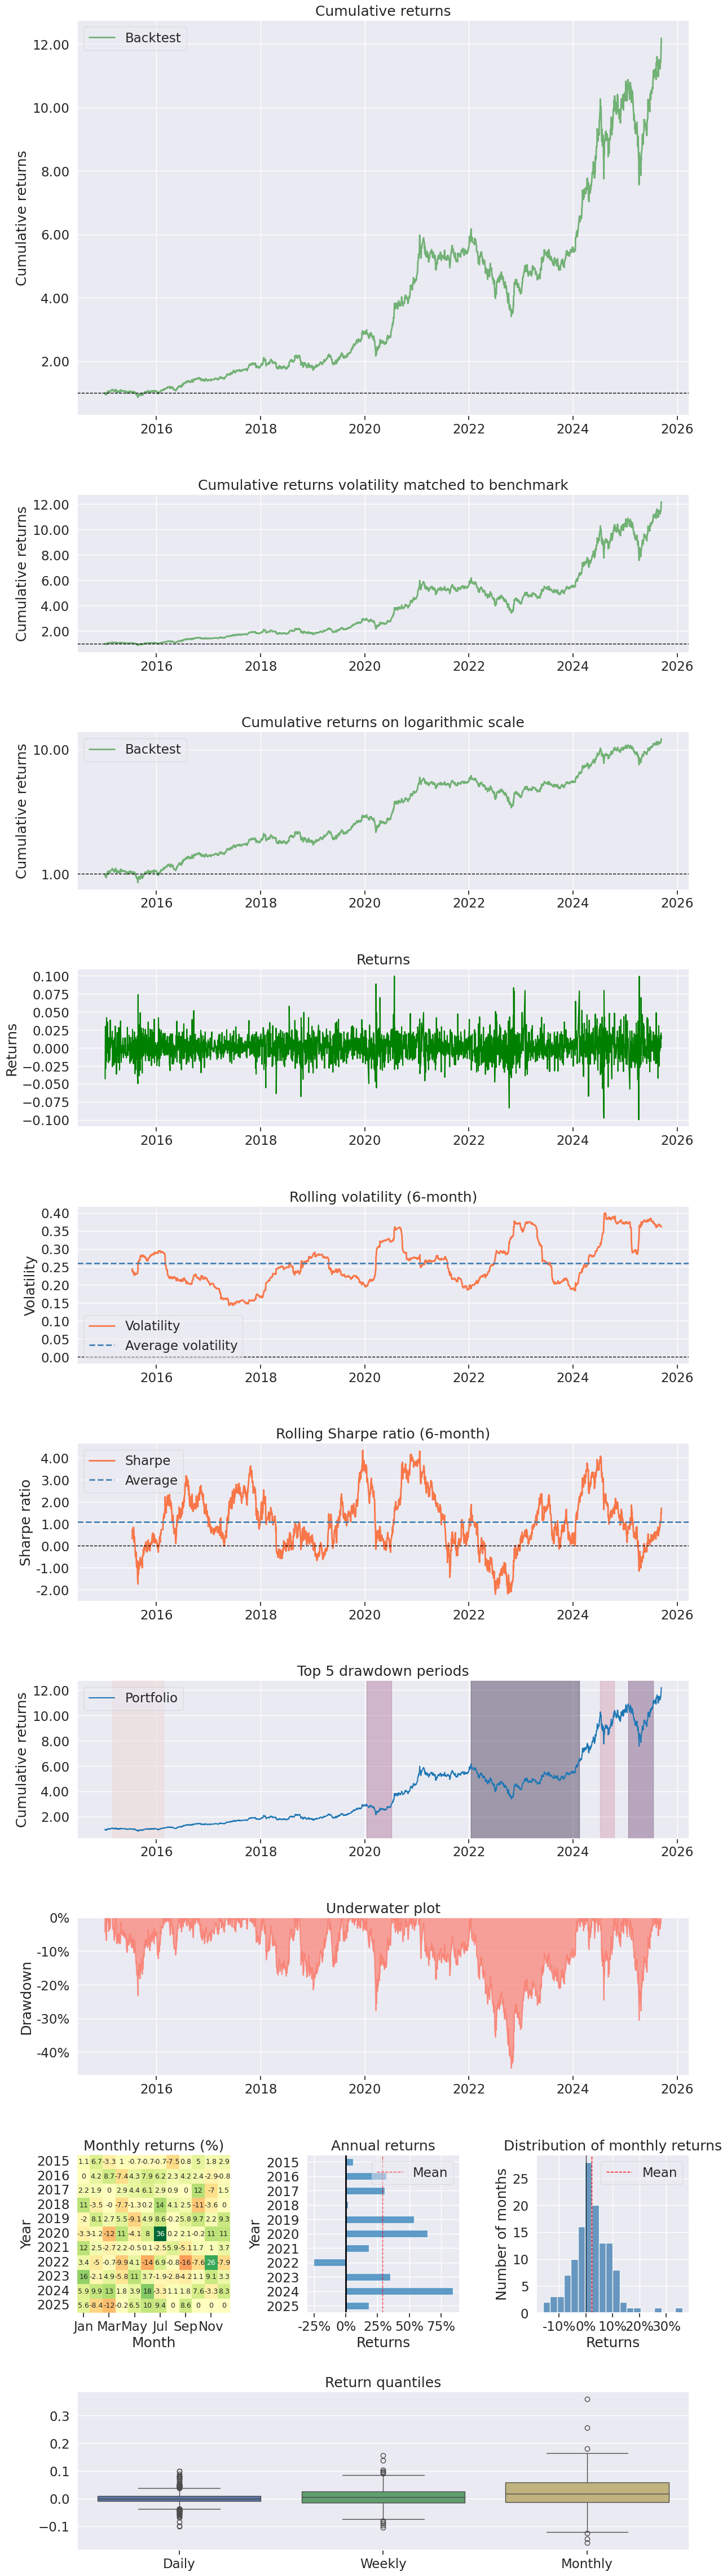

In [27]:
pf.create_returns_tear_sheet(pct_change_close_data)

/var/folders/jd/cst_1lwd4vdgv06j7c62ffp00000gn/T/ipykernel_7746/779838410.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  benchmark_data = yf.download("0050.TW", start="2015-01-01", end="2025-09-15").droplevel(
[*********************100%***********************]  1 of 1 completed
/opt/homebrew/Caskroom/miniforge/base/envs/stock/lib/python3.13/site-packages/pyfolio/plotting.py:670: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '27.388%' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  perf_stats.loc[stat, column] = str(np.round(value * 100, 3)) + "%"


Start date,2015-01-05
End date,2025-09-12
Total months,123
,Backtest
Annual return,27.388%
Cumulative returns,1118.757%
Annual volatility,26.787%
Sharpe ratio,1.04
Calmar ratio,0.61
Stability,0.95
Max drawdown,-44.799%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,44.80,2022-01-17,2022-10-25,2024-02-15,544
1,30.51,2025-01-22,2025-04-09,2025-07-16,126
2,27.63,2020-01-14,2020-03-19,2020-07-08,127
3,24.54,2024-07-11,2024-08-05,2024-10-18,72
4,23.20,2015-02-25,2015-08-24,2016-02-18,257


/opt/homebrew/Caskroom/miniforge/base/envs/stock/lib/python3.13/site-packages/pyfolio/plotting.py:1407: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["Daily", "Weekly", "Monthly"])


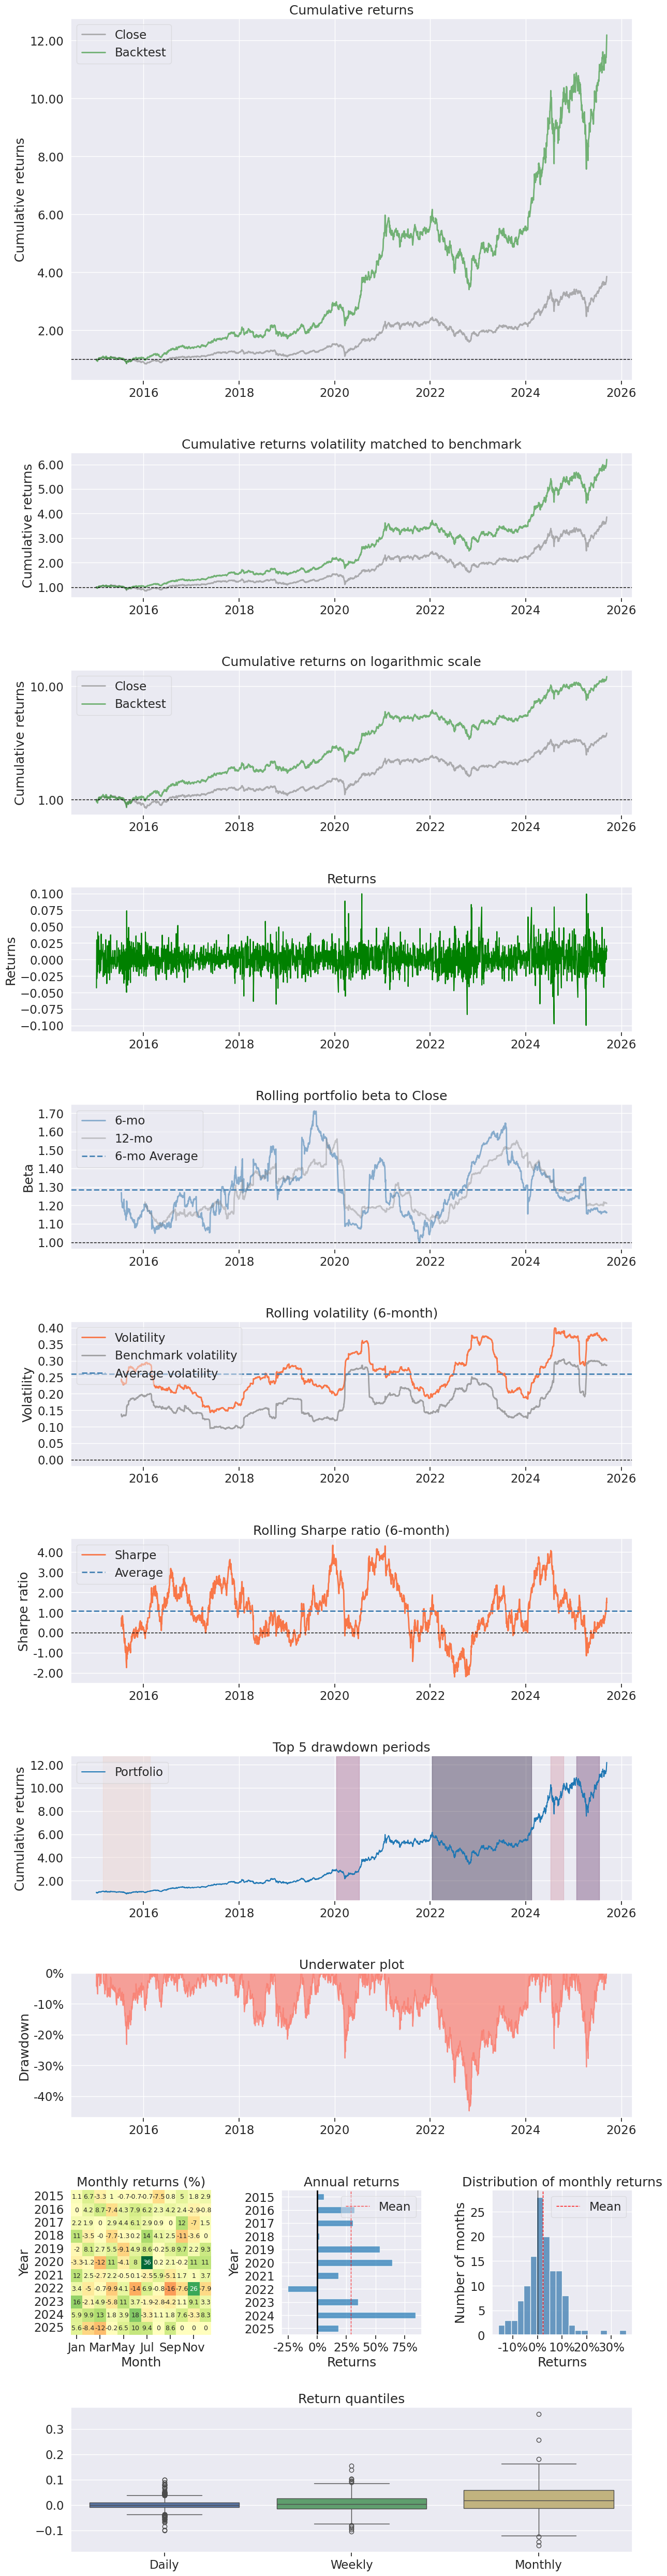

In [30]:

# 將台積電的表現與大盤指數的 ETF 作比較，生成投資收益表
benchmark_data = yf.download("0050.TW", start="2015-01-01", end="2025-09-15").droplevel(
    "Ticker", axis=1
)


# 計算每日收盤價的百分比變動，這代表每日的收益率
pct_change_benchmark_close_data = benchmark_data["Close"].pct_change()
# 使用 PyFolio 生成投資收益表，將台積電績效與 ETF 比較
pf.create_returns_tear_sheet(
    pct_change_close_data, benchmark_rets=pct_change_benchmark_close_data
)

/var/folders/jd/cst_1lwd4vdgv06j7c62ffp00000gn/T/ipykernel_7746/1506674722.py:29: FutureWarning: YF.download() has changed argument auto_adjust default to True
  dataname=yf.download("0050.TW", start="2015-01-01", end="2025-09-15").droplevel(
[*********************100%***********************]  1 of 1 completed
/opt/homebrew/Caskroom/miniforge/base/envs/stock/lib/python3.13/site-packages/pyfolio/plotting.py:670: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '6.933%' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  perf_stats.loc[stat, column] = str(np.round(value * 100, 3)) + "%"


Start date,2015-01-05
End date,2025-09-12
Total months,124
,Backtest
Annual return,6.933%
Cumulative returns,99.895%
Annual volatility,9.984%
Sharpe ratio,0.72
Calmar ratio,0.32
Stability,0.80
Max drawdown,-21.715%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,21.72,2025-01-07,2025-04-09,2025-07-16,137
1,21.35,2022-01-17,2022-10-25,2024-02-22,549
2,16.64,2024-07-11,2024-08-05,2025-01-07,129
3,10.84,2020-01-14,2020-03-19,2020-07-08,127
4,6.22,2021-01-21,2021-05-17,2021-11-19,217


/opt/homebrew/Caskroom/miniforge/base/envs/stock/lib/python3.13/site-packages/pyfolio/plotting.py:1407: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["Daily", "Weekly", "Monthly"])


Stress Events,mean,min,max
Fall2015,-0.00%,-0.13%,0.18%
New Normal,0.01%,-1.03%,0.47%
Covid,0.05%,-7.69%,7.33%


Top 10 long positions of all time,max
Data0,82.30%


Top 10 short positions of all time,max


Top 10 positions of all time,max
Data0,82.30%


/opt/homebrew/Caskroom/miniforge/base/envs/stock/lib/python3.13/site-packages/pyfolio/pos.py:100: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  longs = expos.where(expos.applymap(lambda x: x > 0))
/opt/homebrew/Caskroom/miniforge/base/envs/stock/lib/python3.13/site-packages/pyfolio/pos.py:101: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  shorts = expos.where(expos.applymap(lambda x: x < 0))
/opt/homebrew/Caskroom/miniforge/base/envs/stock/lib/python3.13/site-packages/pyfolio/plotting.py:323: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_holdings_by_month = df_holdings.resample("1M").mean()
/opt/homebrew/Caskroom/miniforge/base/envs/stock/lib/python3.13/site-packages/pyfolio/plotting.py:1465: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_turnover_by_month = df_turnover.resample("M").mean()


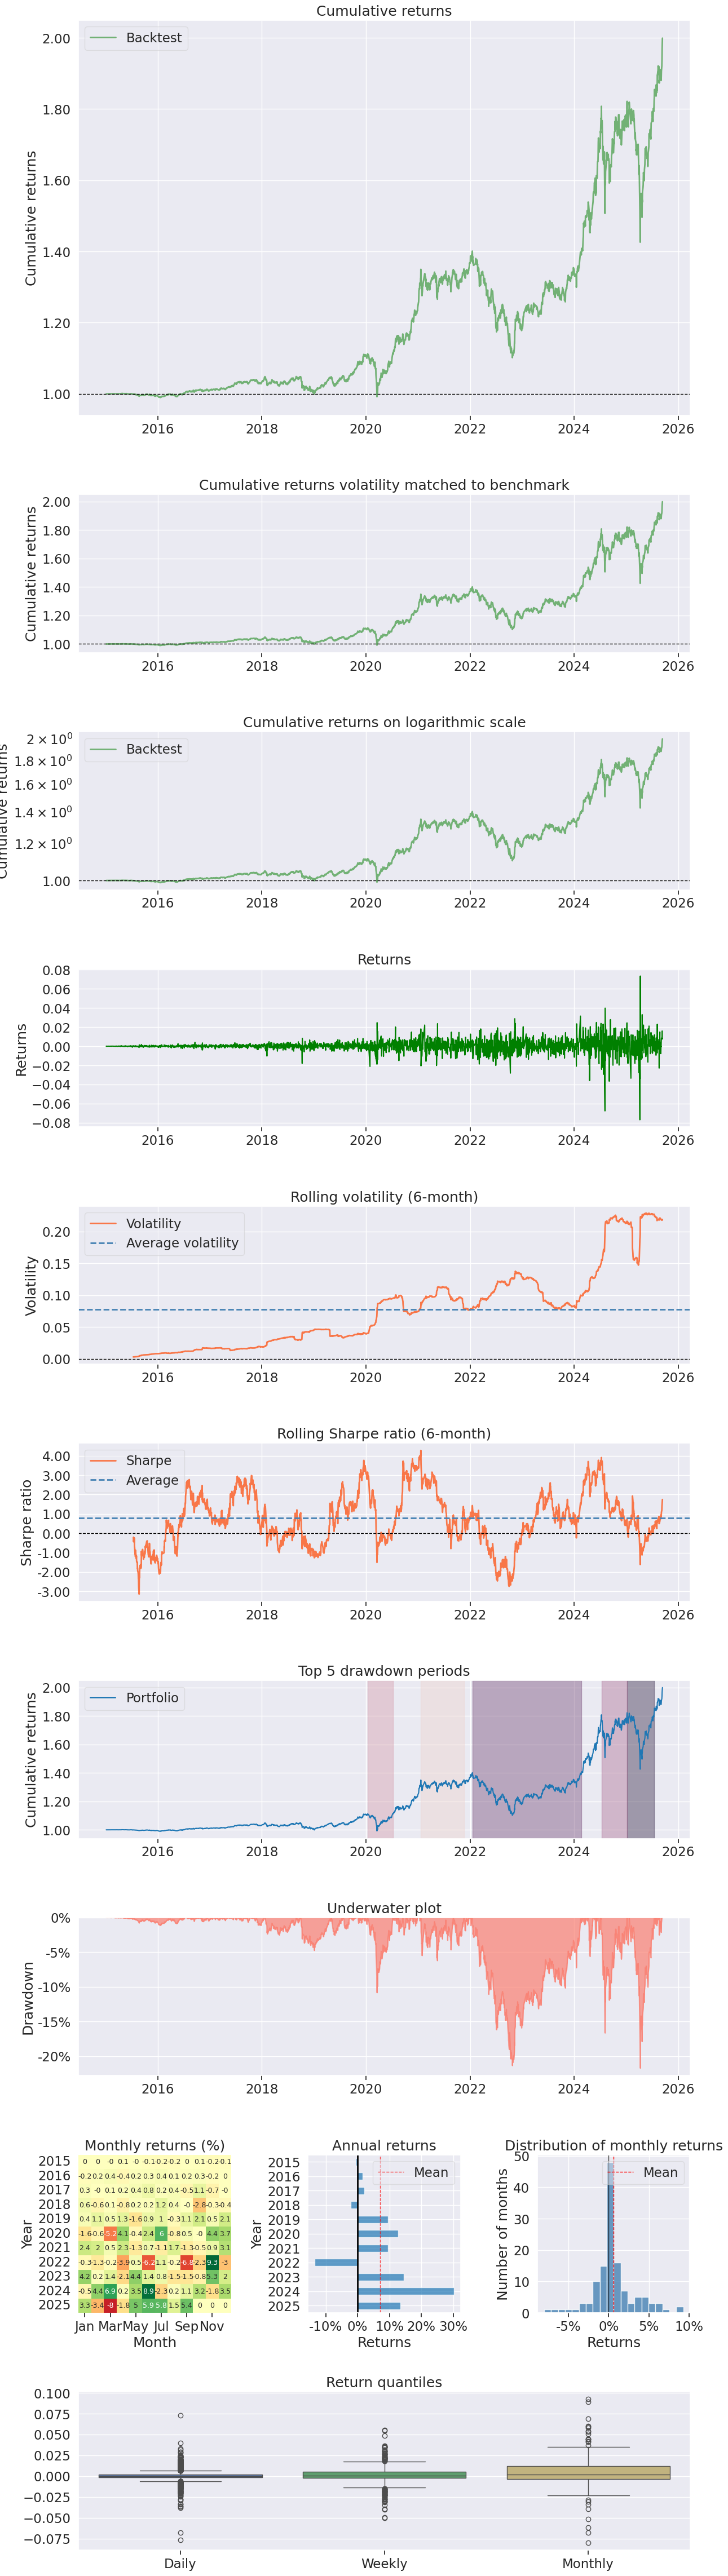

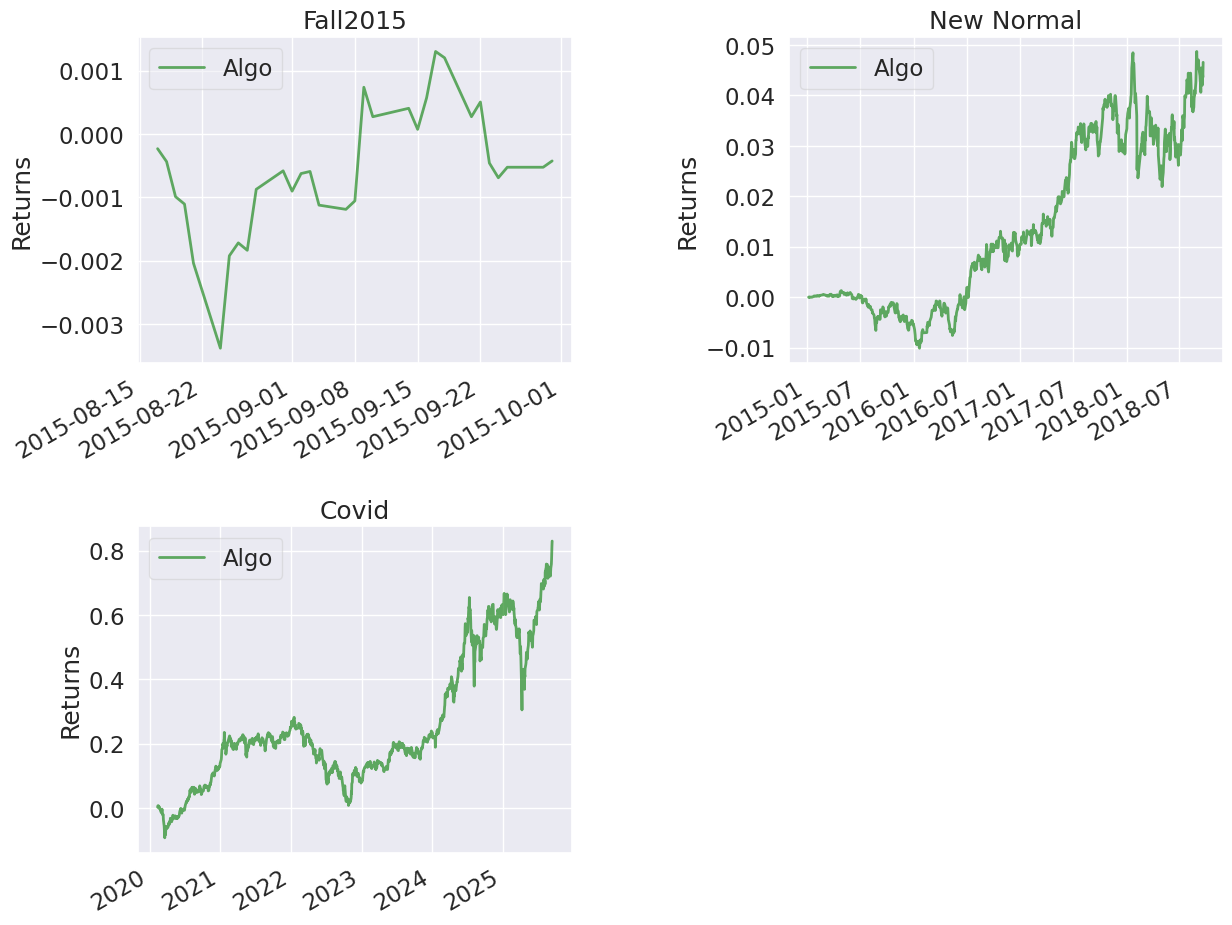

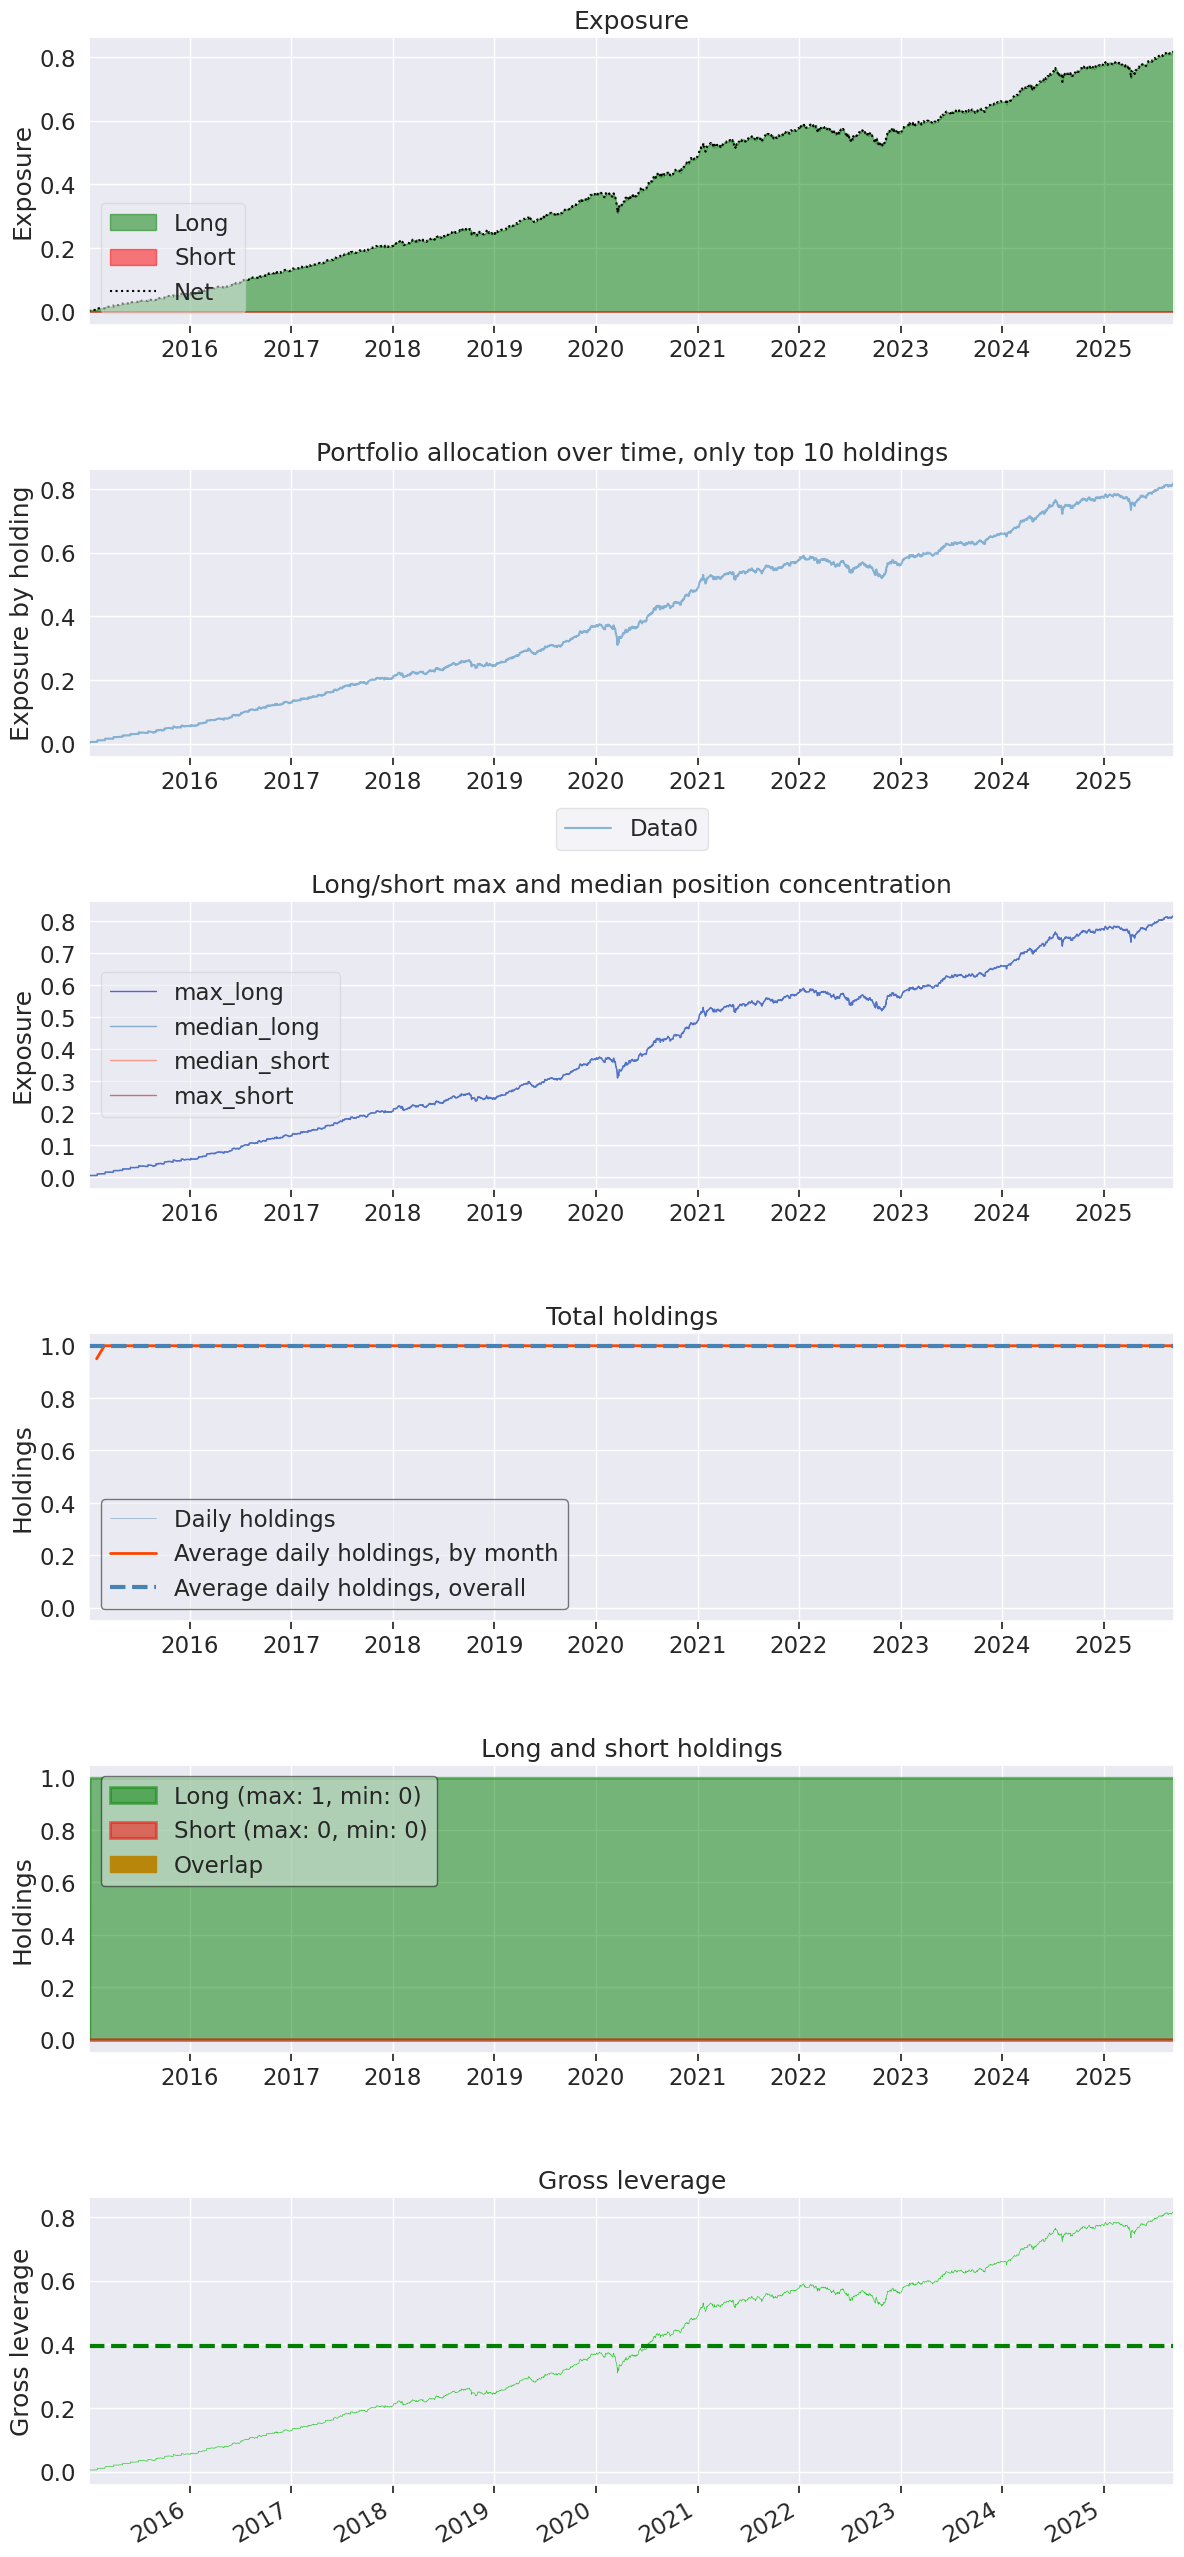

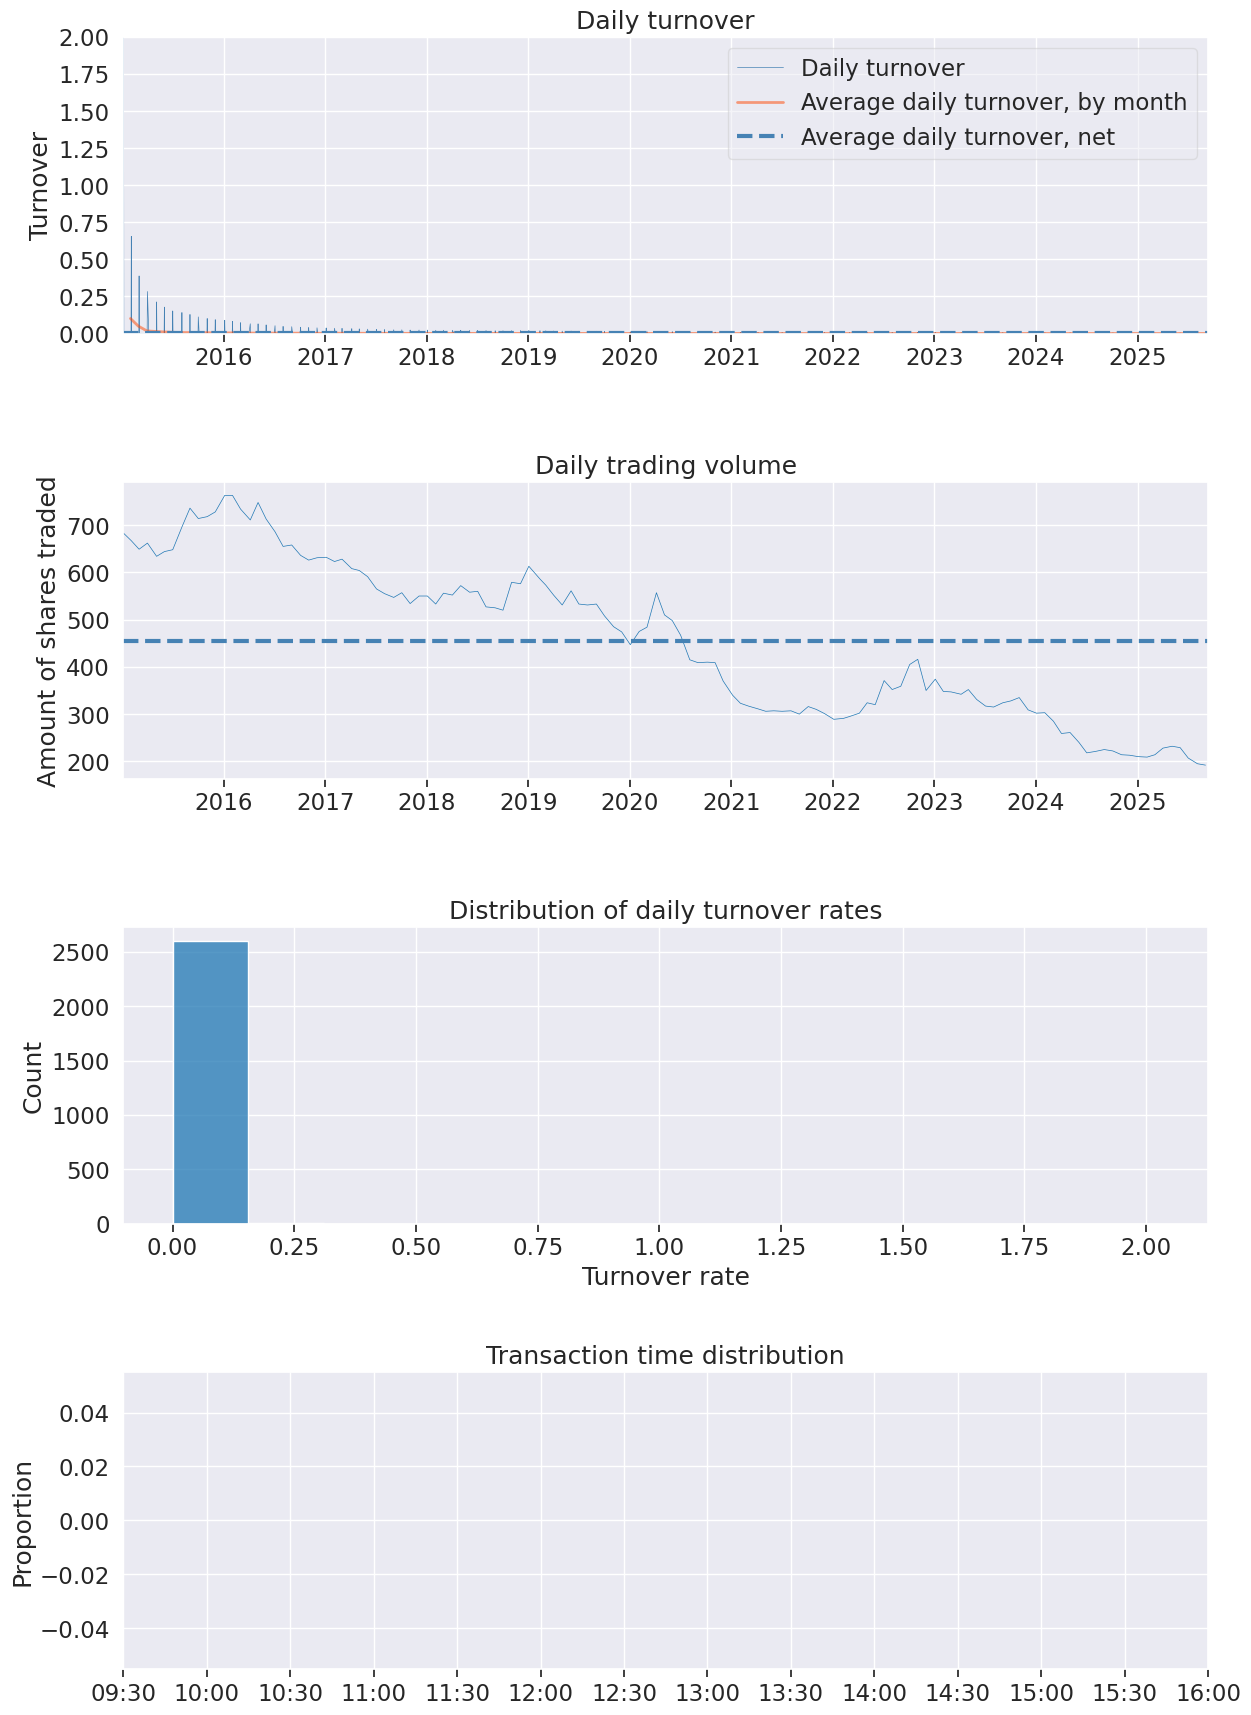

In [32]:
## 定義每月定期定額策略
class MonthlyInvestmentStrategy(bt.Strategy):
    params = (
        ("cash_to_invest", None),
        ("investment_day", None),
    )

    def __init__(self):
        self.add_timer(
            when=bt.Timer.SESSION_START,
            monthdays=[self.params.investment_day],
        )
        self.order = None

    def notify_timer(self, timer, when, *args, **kwrags):
        """定時器觸發時執行的操作"""
        cash_available = self.broker.getcash()
        price = self.data.close[0]
        size = min(self.params.cash_to_invest, cash_available) // price
        if size > 0:
            self.order = self.buy(size=size)
    
    def next(self):
        pass

cerebro = bt.Cerebro()
# 加載 0050 ETF 的數據 
data = bt.feeds.PandasData(
    dataname=yf.download("0050.TW", start="2015-01-01", end="2025-09-15").droplevel(
        "Ticker", axis=1
    )
)
cerebro.adddata(data)
# 加載每月定期定額策略，每月投資 10000 元，投資日設為每月的第一個交易日
cerebro.addstrategy(MonthlyInvestmentStrategy, cash_to_invest=10000, investment_day=1)
cerebro.broker.setcash(2000000) # 設定初始資金
cerebro.broker.setcommission(commission=0.0015) # 設定交易手續費
# 添加 PyFolio 分析器，用於在回測後進行分析
cerebro.addanalyzer(bt.analyzers.PyFolio, _name="pyfolio")
results = cerebro.run() # 執行回測
start = results[0] # 取得第一個策略的結果
# 從策略中取得 PyFolio 分析器，用來進行投資組合績效分析
pyfoliozer = start.analyzers.getbyname("pyfolio")
# 取得回測結果的四個主要部分，用來進一步分析投資組合的表現
# returns: 投資組合的收益率數據序列（例如每日收益率
# positions: 投資組合在不同時間點的持倉情況（例如每個時間點持有多少股票）
# transactions: 投資組合的交易紀錄，詳細記錄買入和賣出的每筆交易
# gross_lev: 投資組合的總槓桿率
returns, positions, transactions, gross_lev = pyfoliozer.get_pf_items()
# 使用 PyFolio 生成完整的投資報告，涵蓋收益、持倉、交易等方面的分析
pf.create_full_tear_sheet(returns, positions, transactions)

In [34]:
import os
import sys

# 取得當前檔案的所在目錄
current_dir = os.path.dirname(os.path.abspath(__name__))
parent_dir1 = os.path.abspath(os.path.join(current_dir, ".."))

In [35]:
current_notebook_dir = os.getcwd()
project_root_path = os.path.dirname(os.path.dirname(current_notebook_dir))
sys.path.append(project_root_path)

import Chapter1.utils as chap1_utils

In [36]:
chap1_utils.finlab_login()

輸入成功!
